
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project(No-show appointments), a dataset of about 100,000 medical appointments were collected in Brazil and this will be analyzed to understand how many patient booked an appointments date and how many did show-up on their appointment dates. Also, what factor could have affected them from either showing up or not.


### Questions to consider!

<ul>
    <li>Does Gender affect if patient will show up  on appointment day?</li>
    <li>How does Age affect the appearance of patient for their appontment day?</li>
    <li>How did weekday affect no_show?</li>
    <li>Can the Neighbourhood of patient influence shoe-up?</li>
    <li>Can the defiencies affect show-up?</li>
</ul>    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#using def function to call out total no. of gender in No_show
def Gender(sex):
    print(df['Gender'].value_counts())
    Gender(sex)

This reveals that more or  twice the male total number were the numbers of females that booked an appointment.

In [8]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


### Data Cleaning 

To commence cleaning of Dataset, I will be editing No-show and and change the '-' to '_' 

In [9]:
#Re-representing No-show
df.rename(columns =  {'No-show': 'No_show'}, inplace =  True)

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#Dropping ages below 10
df.drop(df[df.Age<10].index, inplace=True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,9.305100e+04,9.305100e+04,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000
mean,1.469555e+14,5.675145e+06,43.350195,0.099171,0.234205,0.085276,0.036055,0.025567,0.327541
std,2.556883e+14,7.178694e+04,19.613874,0.298894,0.423503,0.279293,0.186429,0.172168,0.469319
min,3.921784e+04,5.030230e+06,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.164664e+12,5.640406e+06,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.147712e+13,5.680721e+06,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.418284e+13,5.725464e+06,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


While examining the Dataset on describe function, i noticed that the minimum age is starting from '-1' which is not possible. Therefore, i will be dropped all data of patients that start below age 10.

In [13]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace= True)

In [14]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


Also, dropped all column that are not necessary for the investigation to reduce the volume of data.

In [15]:
#converting scheduledday and appointmentday to date from object
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [16]:
#checking for isna
df.isna().any()

Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No_show           False
dtype: bool

In [17]:
#calling out dataset
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis


In [18]:
df_N = df[df['No_show']=='No']
df_N

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [19]:
df_Y = df[df['No_show']=='Yes']
df_Y

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


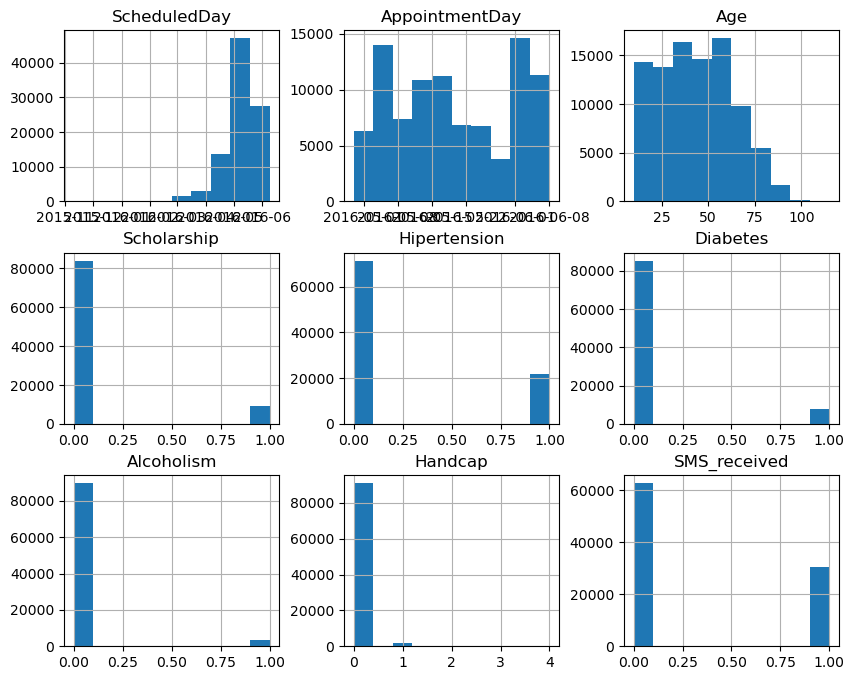

In [20]:
#viewing histogram for columns
df.hist(figsize=(10,8));

### Does Gender affect if patient will show up  on appointment day?

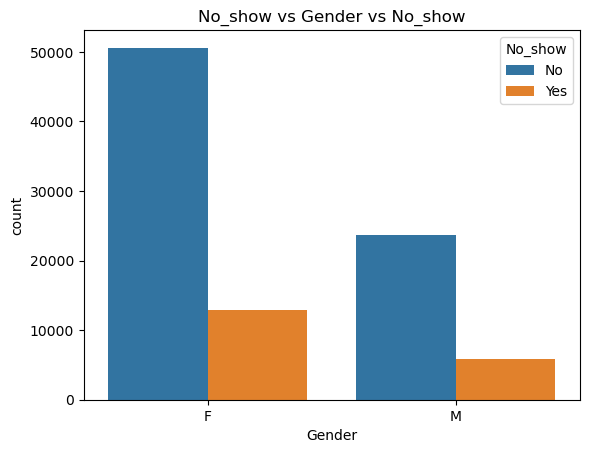

In [21]:
sns.countplot(x="Gender", hue="No_show", data=df)
plt.title('No_show vs Gender vs No_show');

This chart reveals that aside from the fact that more females booked  appointments, Gender does not have significant impact on either if a patient will show up or not.

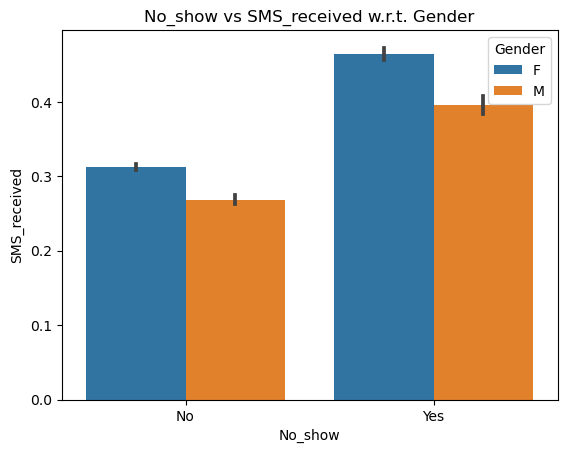

In [22]:
sns.barplot(x='No_show', y='SMS_received', hue='Gender', data=df)
plt.title('No_show vs SMS_received w.r.t. Gender');

This chart reveals that comparing the No_show result to the number of patient who received an SMS, the males that showed up with respect to numbers are competing  

## How does Age affect the appearance of patient for their appontment day?

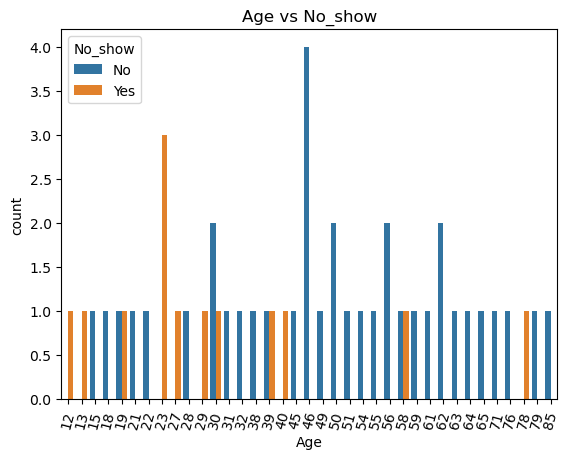

In [23]:
#Relationship between Age and No_show
plt.xticks(rotation=75)
sns.countplot(x="Age", hue="No_show", data=df.head(50))
plt.title('Age vs No_show');

From the count plot, we can see that patient within the age of 23-44 have high number or rate of not showing up on their appointment day probably, because their appointment date falls between the week and they will have to be at work since we can assume that this age is the working age.
This is leading us to our next investigation.

## How did weekday affect no_show?

In [24]:
#creating new column for month and weekday
df['month_A'] = pd.DatetimeIndex(df.AppointmentDay).month
df['month_S'] = pd.DatetimeIndex(df.ScheduledDay).month
df['weekday_A'] = pd.DatetimeIndex(df.AppointmentDay).weekday

In [25]:
df.groupby('No_show')['weekday_A'].value_counts()

No_show  weekday_A
No       2            17614
         1            17266
         0            14932
         4            12646
         3            11728
         5               30
Yes      1             4407
         2             4279
         0             3902
         4             3403
         3             2835
         5                9
Name: weekday_A, dtype: int64

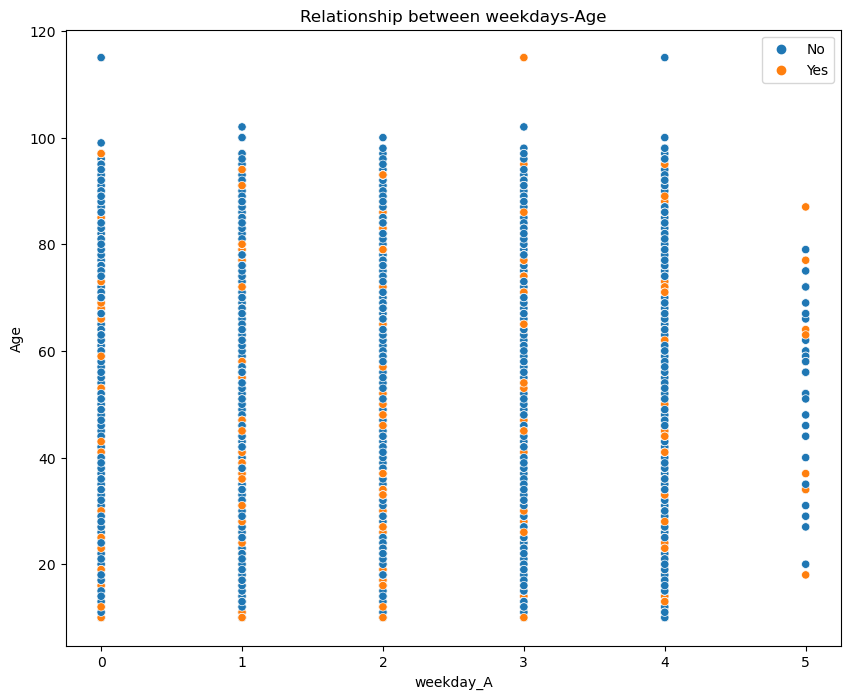

In [26]:
#Relationship between age and appointment weekday  w.r.t. No_show
plt.figure(figsize=(10,8))
sns.scatterplot(x="weekday_A", y="Age", hue="No_show", data=df)
plt.title('Relationship between weekdays-Age')
plt.legend();

Considering the weekday chart, we can see that we have more yellow marks around age 20-45, from monday to friday which means these patients were not able to show up unlike saturday.

## Can the Neighbourhood of patient influence shoe-up?

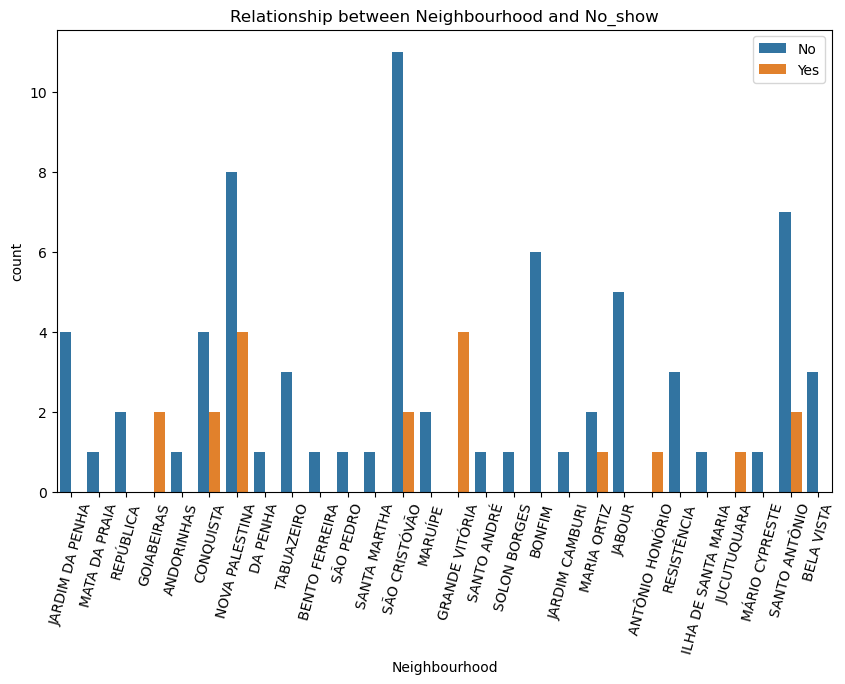

In [27]:
#Relationship between Neighbourhood and No_show
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(x="Neighbourhood", hue="No_show", data=df.head(90))
plt.title('Relationship between Neighbourhood and No_show')
plt.legend();

it appears that patients who lives around certain Neighbourhoods will show up more for their appointments than some in other locations. This could be as a result that the clinic is closer to this location than to the others.

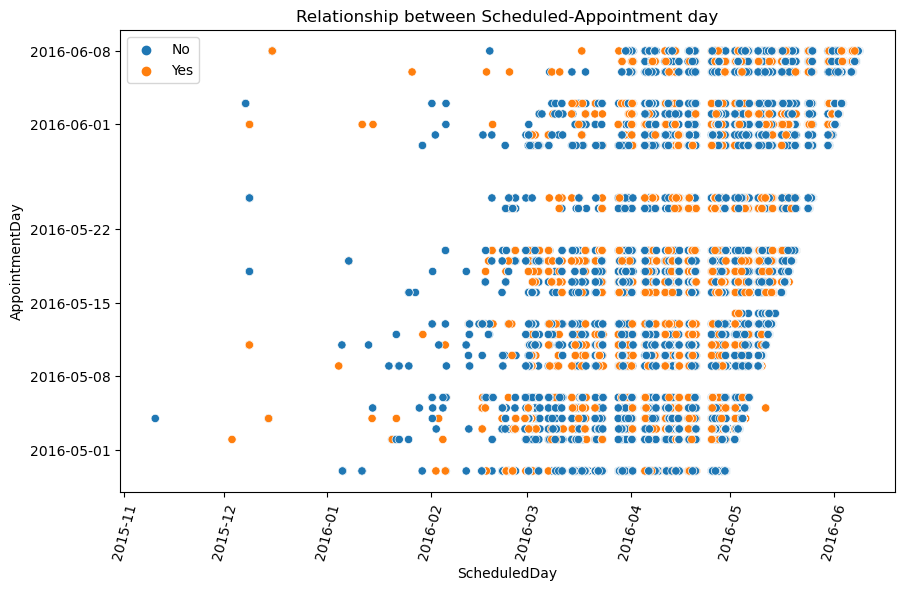

In [35]:
#Relationship between scheduledday and appointmentday w.r.t. No_show
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.scatterplot(x="ScheduledDay", y="AppointmentDay", hue="No_show", data=df)
plt.title('Relationship between Scheduled-Appointment day')
plt.legend();

This shows the correlation between the scheduled day and the appointment day for the no-show columns.

In [29]:
#Calling out month_A & S
df.groupby('No_show')['month_A'].value_counts()
df.groupby('No_show')['month_S'].value_counts()

No_show  month_S
No       5          46875
         4          14712
         6          10272
         3           2104
         2            173
         12            42
         1             37
         11             1
Yes      5          10059
         4           6500
         6           1184
         3            991
         2             69
         12            19
         1             13
Name: month_S, dtype: int64

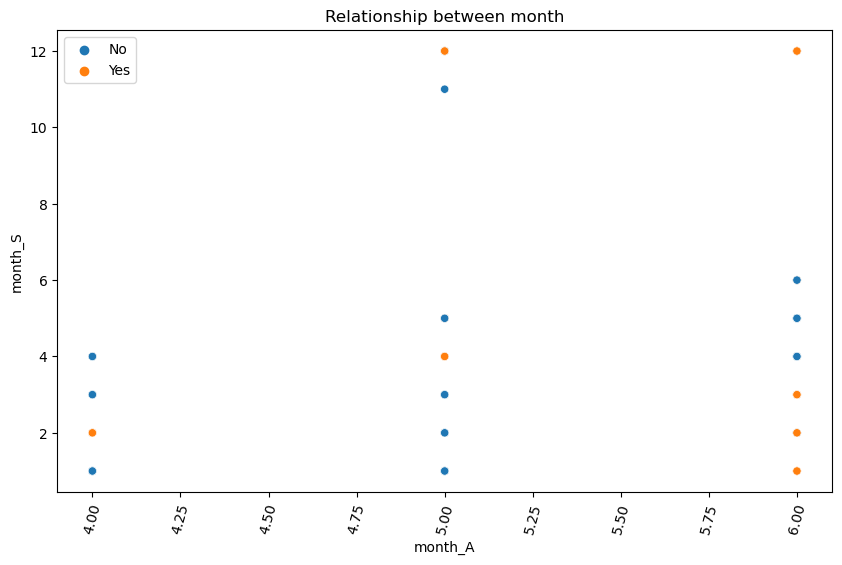

In [30]:
#Relationship between month_A and month_S w.r.t. No_show
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.scatterplot(x="month_A", y="month_S", hue="No_show", data=df)
plt.title('Relationship between month')
plt.legend();

## Can the defiencies affect show-up?

In [31]:
diagnosis = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

In [32]:
list(enumerate(diagnosis))

[(0, 'Hipertension'), (1, 'Diabetes'), (2, 'Alcoholism'), (3, 'Handcap')]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

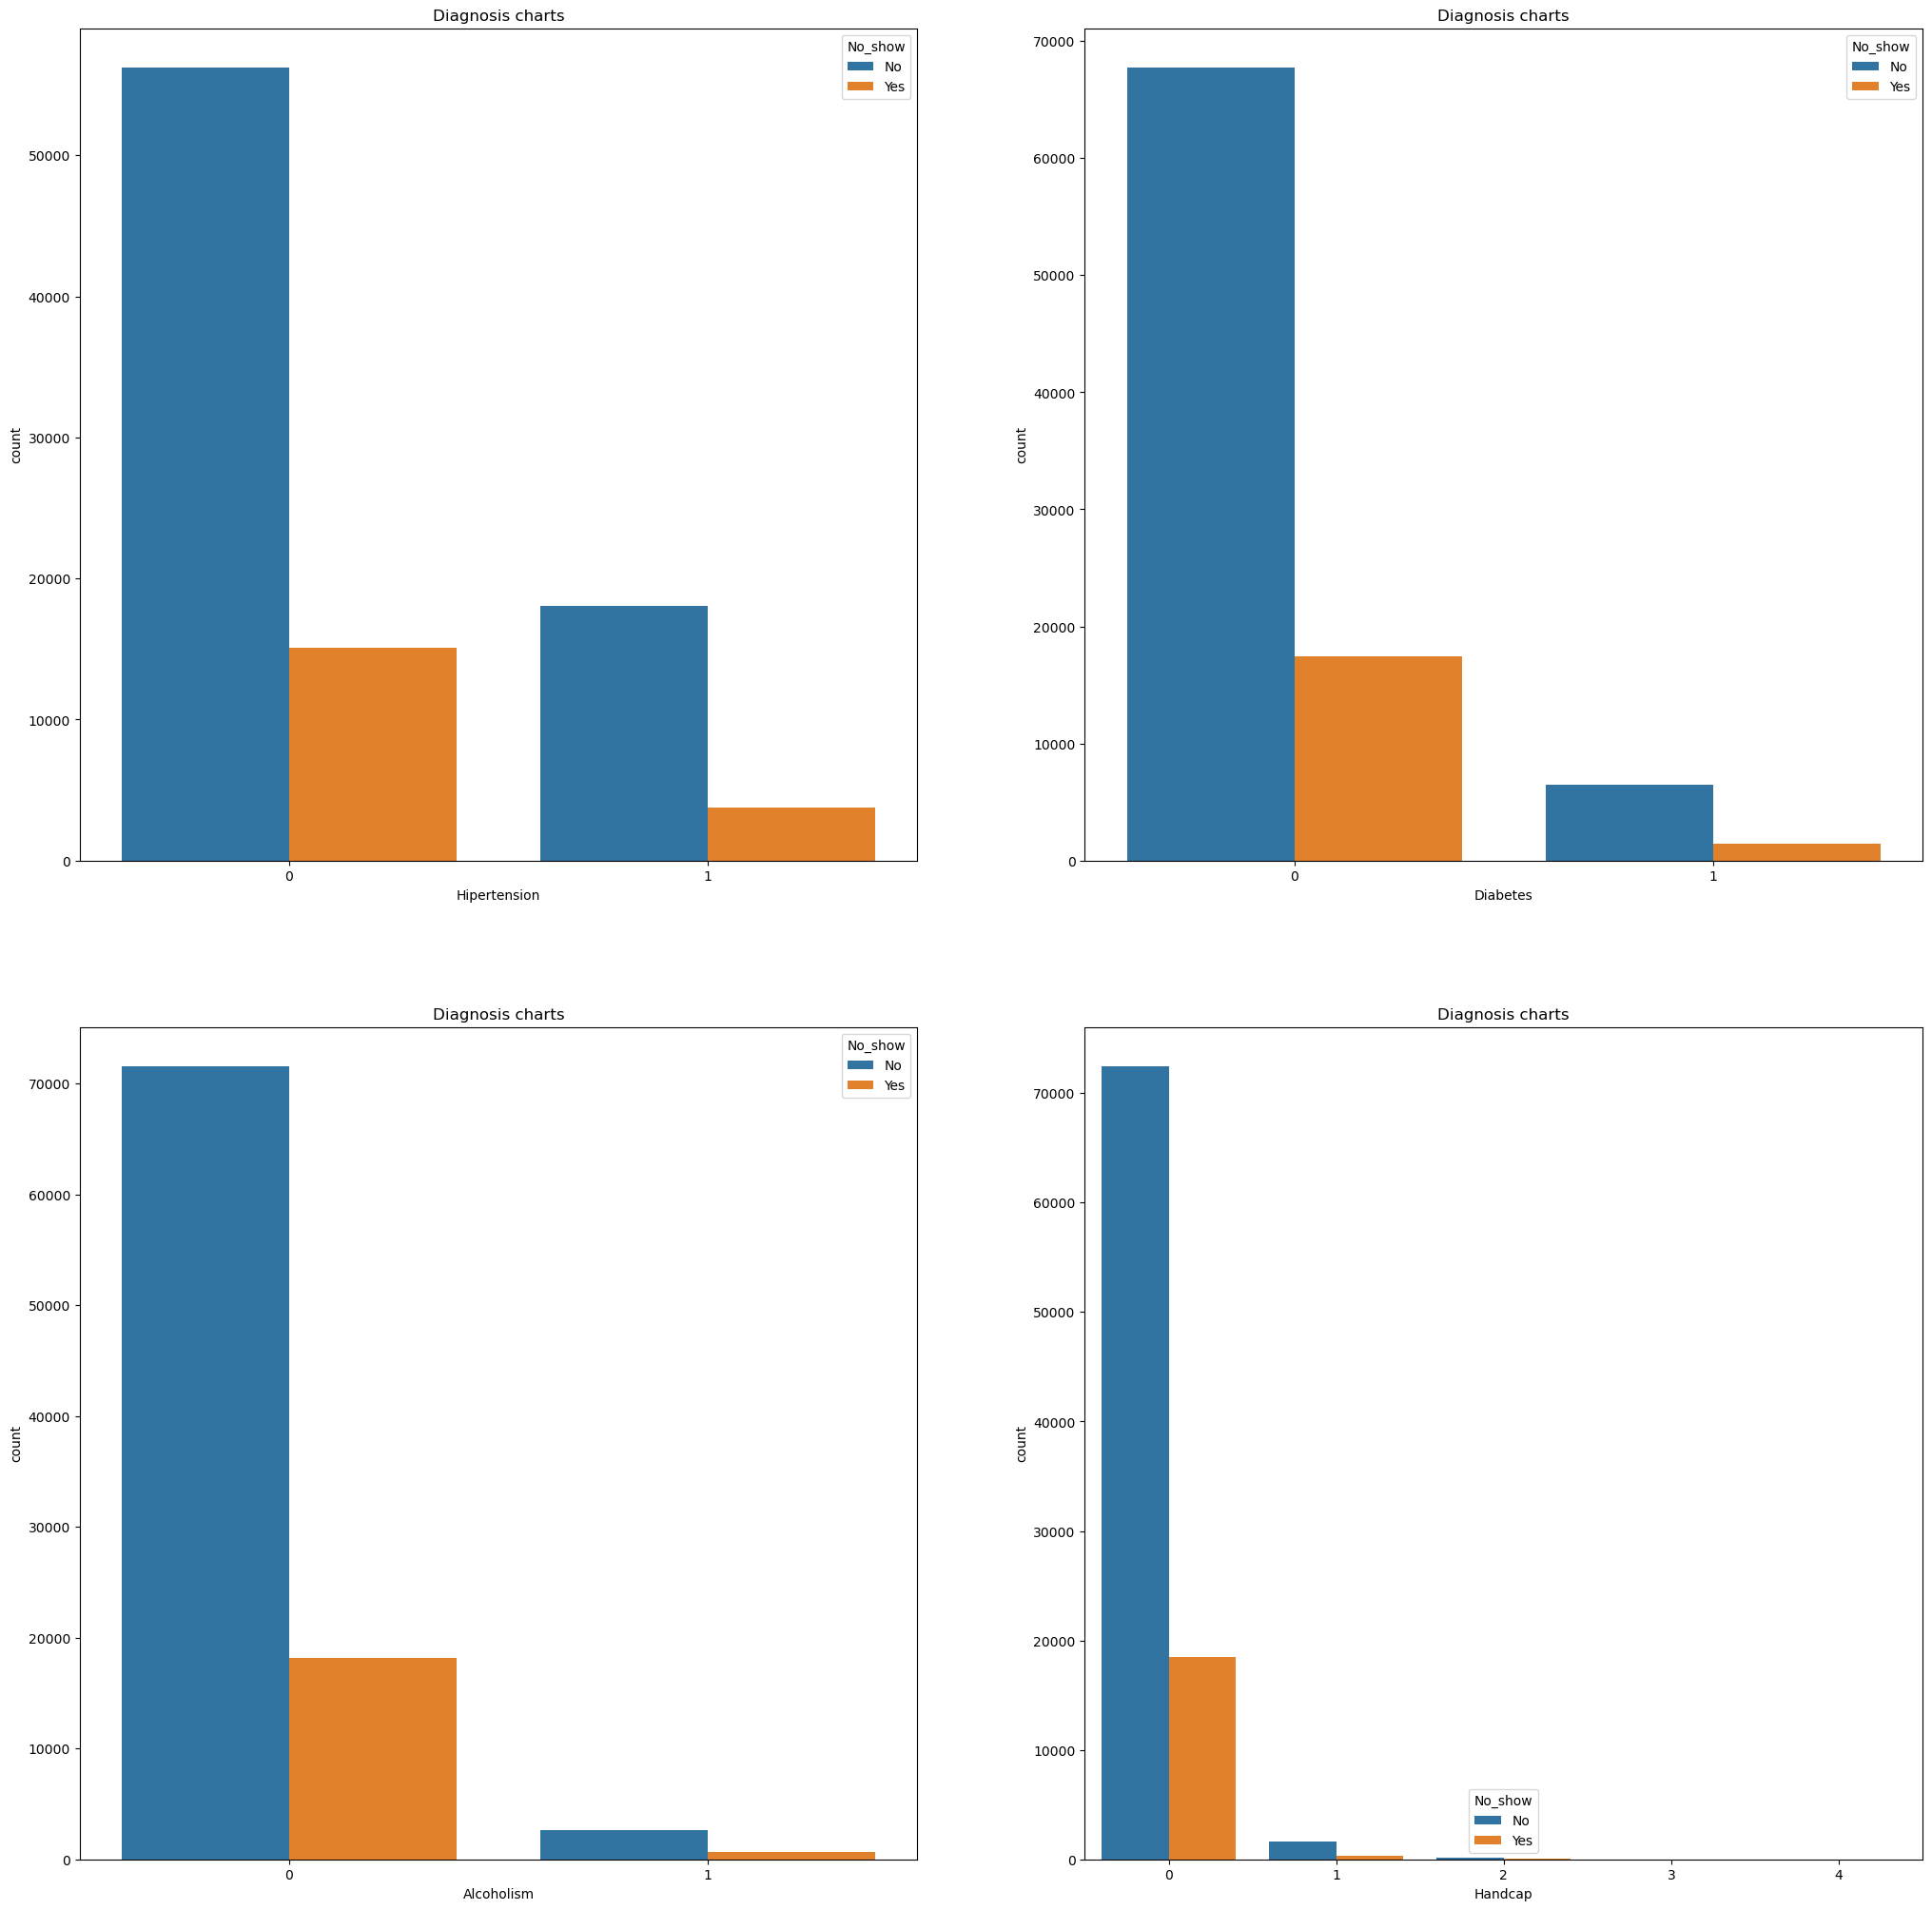

In [33]:
plt.figure(figsize=(25,25))
for i in enumerate(diagnosis):
    plt.subplot(2,2, i[0]+1)
    sns.countplot(i[1], hue="No_show", data=df)
    plt.title('Diagnosis charts');

Now we can see after studying the relationships between the deficiencies table that it will really affect the showing up of patients. Most especially, this could happen if these patients have no one to support or assist them when it's their appointment day due to inability to walk, remember etc.

<a id='conclusions'></a>
## Conclusions

1.  Based on the investigation, it could be drawn that though the specific location or distance of the neighbourhood clinics to the patients were not given, yet we can see that it surely have significant impact on the show-up of patients.
2. Also, after seeing that the total number females that booked appointment twice that of males, it did not have much impact on if the patients will show-up.
3. Considering the weekday analysis, we can see that patient within the age of 20-45 have high tendencies of not showing up whichcould be as a result of work, since thisis the working class age.
4. Now we can see after studying the relationships between the deficiencies table that it will really affect the showing up of patients. Most especially, this could happen if these patients have no one to support or assist them when it's their appointment day due to inability to walk, remember etc.


## Limitation

Based on the investigation, it could be drawn that though the specific location or distance of the neighbourhood clinics to the patients were not given, yet we can see that it surely have significant impact on the show-up of patients.

Also, i discovered that in the dataset the minimum age was '-1' which is not possible.


## Reference

Data analysis with python course - numpy, pandas, data visualization. 
 freecodecamp.org